<a href="https://colab.research.google.com/github/bmsceritika/EDA_ML-Modelling--Car_Features_and_MSRP/blob/master/ML_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Internship Project : Exploratory Data Analysis of Car Features**

This project, done under Machine learning internship from Internship Studio is a exploratory data analysis on the Kaggle dataset **"Car Features and MSRP"** on how the different features of a car and its price are related.

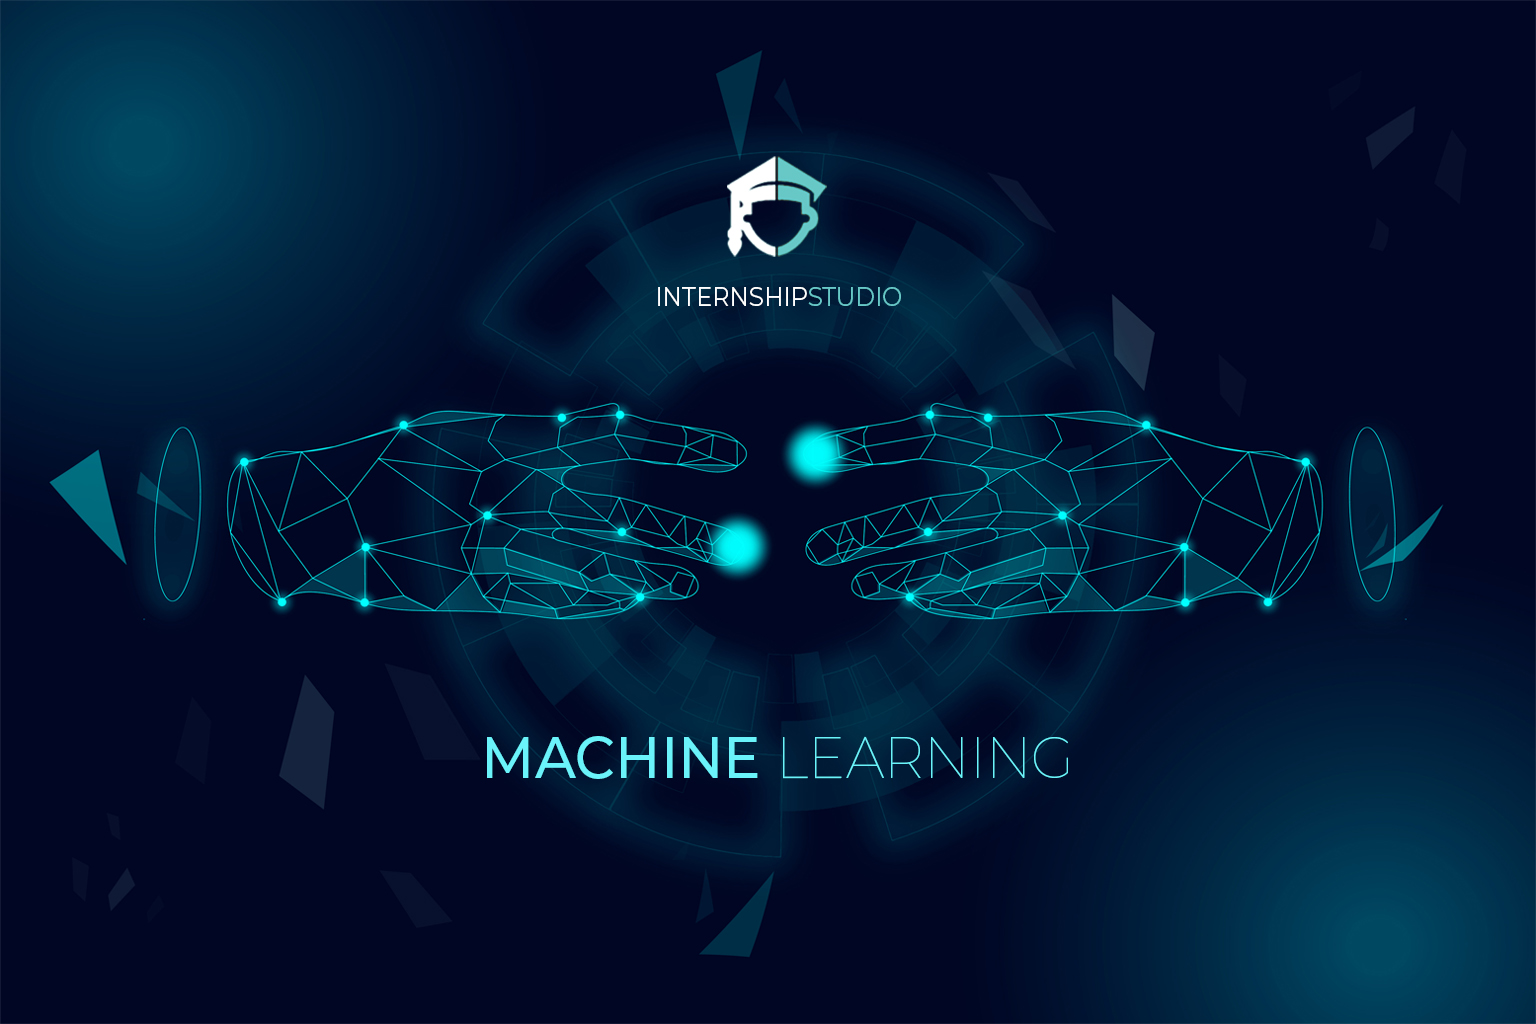

**Exploratory Data Analysis(EDA):**In statistics and data-mining, EDA is an approach to analyze data sets to summarize their main characteristics, often with visual methods.It shows us what the data can tell us before the modelling task and, hence can helps us prepare the data for optimal efficient modelling. This initial investigations on data shelps us discover patterns,spot anomalies,to test hypothesis and check assumptions with the help of summary statistics and graphical representations.

**Now we shall perform data analysis on our dataset, step wise, as follows:**


# [1.1] Importing libraries and reading the data set


We shall use the popular python libraries- Numpy, Pandas, Matplotlib and Seaborn-library to perform data analysis on the given data set. Matplotlib and Seaborn-library are used for visualization purposes.

We convert the csv file into a Pandas DataFrame using read_csv function as it provides various functionalities to analyze,change and extract valuable information from the data set. 

In [1]:
import numpy as np                    #Importing the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
car_df=pd.read_csv('data.csv')        #Reads the csv data-set provided and converts it to a dataframe

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#[1.2] Glimpse of the available dataset

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand hence we shall now try getting an insight into the data we shall be working on.

In [2]:
car_df.head()
#Displays first 5 rows of the dataframe to get an overview of the data we are working on.

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We can see that our dataset has elaborate details of car models . Our dataset set comprises of details of several features and specifications of every model.

In [3]:
#Helps us have an idea of the size of our dataset by showing no. of rows and columns in the dataframe
car_df.shape

(11914, 16)

In [4]:
#To know the columns, data types and no. of missing values of each column in the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Here we realize that the MSRP is already in integer format and hence can be directly worked upon. One more important observation is that there are no Null cells under MSRP which is our target feature.

In [5]:
#To view the value of some important statistical measures(summary) of relevant columns
car_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


From this we realize that our dataset gives details of cars manufactured from 1990 up till 2017. The 2 or 4 car doors made during this span of time have givent city mpg in the range 5- 137 mpg and highway mpg in the range 12- 354 mpg. Some cars have incorporated upto 16 cylinders. the price range starts fromm 2000 USD and has multiplied nearly a thousand times. This may be an indicator of outliers. We will check for them in the coming steps.

In [6]:
car_df.isnull().sum()                 #Gives the sum of missing values under each column index   

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

#[2] Cleaning the data set

We shall format the data to remove any feature which either does not contribute to the price of cars or has extensively excessive missing data.

We realize that the column "Market Category" has a significantly large number of missing values(More than 30% of total values). It is also comparatively less relevant to our EDA, hence we shall drop this column.

In [7]:
car_df.drop(["Market Category"],axis=1,inplace= True)
car_df.shape

(11914, 15)

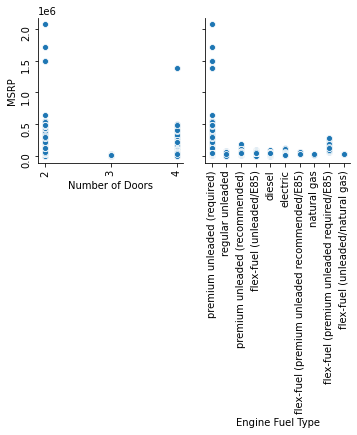

In [8]:
#To visualise relationship of certain variables with price
g=sns.pairplot(car_df,y_vars=["MSRP"],x_vars=["Number of Doors","Engine Fuel Type"])
for x_lab in g.axes.flatten():
    # rotate x axis labels for better visibility
    x_lab.tick_params(rotation = 90)


We can visualize from the pair plots that the price for cars irrespective of number of doors or fuel type mainly lies in a small region(0.0 to 0.75). Only a small amount of 2 car doors and premium unleaded(required) fuel have MSRP greater than usual. Hence these 2 features do not affect price greatly. Thus from layman understanding, and looking at the scatter plots, we can opt to drop the columns- Number of doors and Engine Fuel type as they do not affect the price severely due to their minimal or predictable variations.

In [9]:
#Dropping the columns
car_df.drop(["Number of Doors","Engine Fuel Type"],axis=1,inplace= True)
car_df.shape

(11914, 13)

Considering other features to be significant contributors to the price of the car, we have refrained from eliminating any of the same.

# [3] Making data accessible

For convenience we shall rename some of the features with precise indicators as asked.This shall increase the readability of the data set and avoid confusions.

In [10]:
car_df=car_df.rename(columns= {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

In [11]:
car_df.info()                        #To check the renamed features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Drive Mode     11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   Vehicle Style  11914 non-null  object 
 9   MPG-H          11914 non-null  int64  
 10  MPG-C          11914 non-null  int64  
 11  Popularity     11914 non-null  int64  
 12  Price          11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


# [4] Detecting and removing outliers

In statistics, an outlier is an observation point that is distant from other observations.Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are outliers, and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

We shall use a box plot for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points.Hence an outlier will plotted as point in boxplot but other population will be grouped together and display as boxes.Below are the box plots of some important features.

Text(0.5, 1.0, 'MSRP')

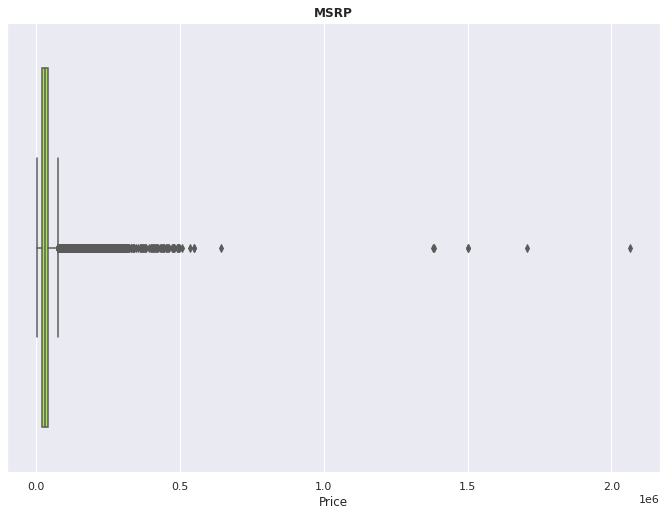

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=car_df["Price"], color="greenyellow").set_title("MSRP",weight='bold')

Text(0.5, 1.0, 'Engine Horsepower')

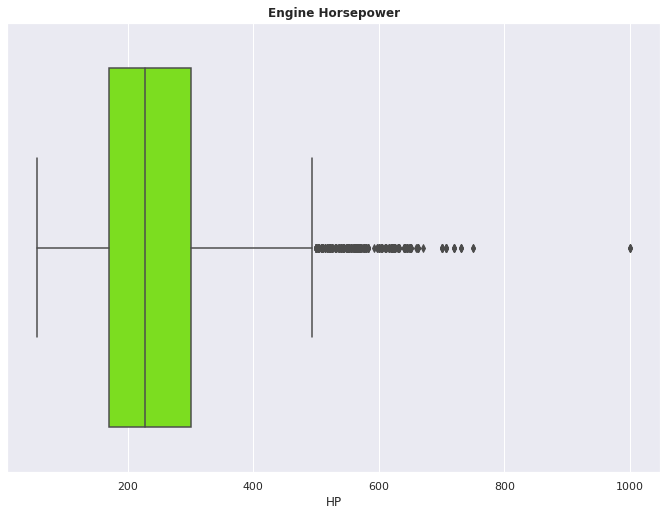

In [13]:
sns.boxplot(x=car_df["HP"], color="lawngreen").set_title("Engine Horsepower",weight='bold')

Text(0.5, 1.0, 'Engine Cylinders')

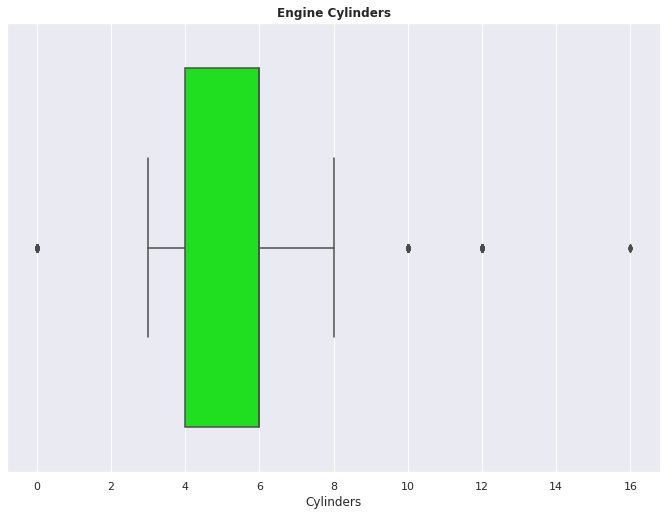

In [14]:
sns.boxplot(x=car_df["Cylinders"], color="lime").set_title("Engine Cylinders",weight='bold')

Text(0.5, 1.0, 'Highway Mileage')

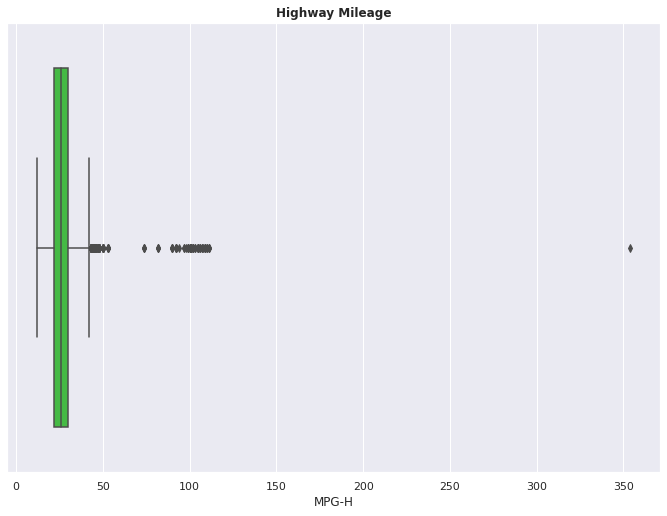

In [15]:
sns.boxplot(x=car_df["MPG-H"], color="limegreen").set_title("Highway Mileage",weight='bold')

Text(0.5, 1.0, 'City Mileage')

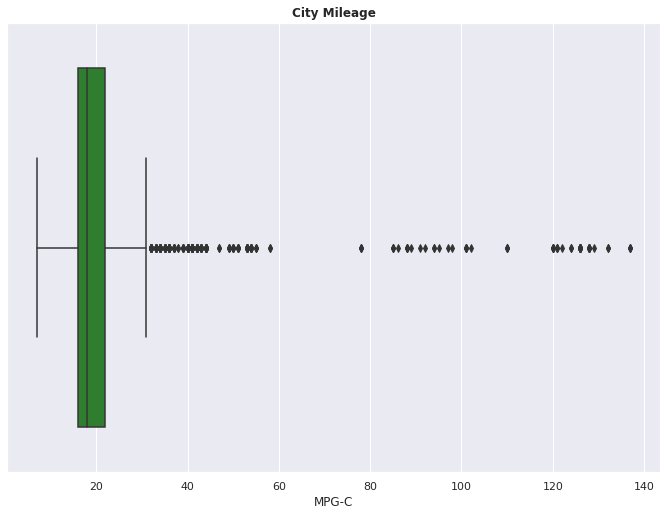

In [16]:
sns.boxplot(x=car_df["MPG-C"], color="forestgreen").set_title("City Mileage",weight='bold')

From the above boxplots we can visualize the outliers under each feature column. The features have large variation in some data points, which is alarmingly large in features like MSRP and MPG. To avoid these from affecting the accuracy of our model we shall remove them.

We use IQR Method to do so. This is the method using which boxplots are plotted too. IQR or Inter Quartile Range is the first quartile subtracted from the third quartile(Q3-Q1). It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [17]:
Q1 = car_df.quantile(0.25)              #First Quartile- 25%
Q3 = car_df.quantile(0.75)              #Third Quartile- 75%
IQR = Q3-Q1                             #Inter Quartile Range
IQR

Year              9.00
HP              130.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21231.25
dtype: float64

We calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 75th percentile to give the actual limits on the data. Only data falling in this range is picked for further data analysis.

In [18]:
car_df_new = car_df[~((car_df < (Q1 - 1.5 * IQR)) |(car_df > (Q3 + 1.5 * IQR))).any(axis=1)]
car_df_new.shape

(9084, 13)

The boxplots of the new dataset with outliers removed can be visualized to see the significant reduction in outliers(Can be viewed from the screenshoted image of the plots below.)

In [19]:
#sns.boxplot(x=car_df_new["Price"]).set_title("MSRP")

In [20]:
#sns.boxplot(x=car_df_new["HP"]).set_title("Engine HP")

In [21]:
#sns.boxplot(x=car_df_new["Cylinders"]).set_title("Engine Cylinders")

In [22]:
#sns.boxplot(x=car_df_new["MPG-H"]).set_title("City MPG")

In [23]:
#sns.boxplot(x=car_df_new["MPG-H"]).set_title("Highway MPG")

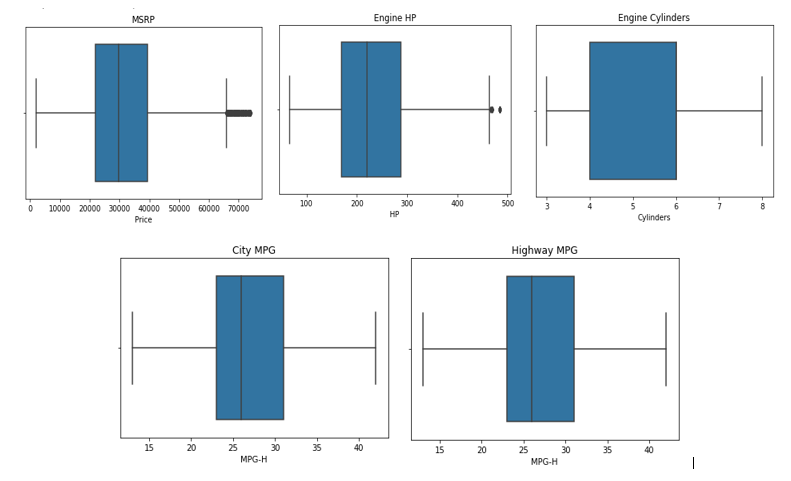

# [5.1] Removing Duplicates

In large datsets there is a high probability of existence of duplicates.We shall check for the same, and remove them to enable a more well suited ML model formation from this data.

In [24]:
print("Total number of duplicate rows:",car_df_new.duplicated().sum())
#To check the number of duplicate rows

Total number of duplicate rows: 529


In [25]:
car_df_new.shape        #Shape of the dataset before removal of duplicates

(9084, 13)

The number of duplicate rows in our data is nearly 5% of the total number of rows. These duplicates could reduce the accuracy of our data model. Hence it is important to drop them

In [26]:
car_df= car_df_new.drop_duplicates()
car_df.shape            #shape of the data set post removal of duplicates

(8555, 13)

# [5.2] Imputating null values

As we had seen while taking a glimpse into the dataset, a few features had cells with missing values(NaN or null values). We can either drop these rows or impute these cells with relevant values. We shall be doing the latter so as to avoid losing data by removing them. Since we have already eliminated the outliers in our dataset, we can safely impute the missing values with the mean of their respective column/feature. 

In [27]:
car_df.isnull().sum()

Make              0
Model             0
Year              0
HP               11
Cylinders        19
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

Though we have a negligible number of empty cells, it is important to fill them so that they don't hinder our EDA or data modelling process.

In [28]:
#Filling missing cells with mean
car_df.fillna(car_df.mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
car_df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

# [6] Most represented cars

Now that we cleaned the dataset quite well we can try finding further insights from the data.To begin with, we are going to find the car types or 'Makes' which have appeared in the data most frequently and find an average among the prices of these top car brands. This can give us a impression of popular types/brands of cars and viable range of cost of the same.

In [30]:
#To find the top 10 car brank makes in the data set
x=car_df["Make"].value_counts()[:10].sort_values(ascending=False)  
x

Chevrolet     1031
Toyota         569
Nissan         513
Volkswagen     513
GMC            469
Dodge          425
Mazda          397
Honda          373
Suzuki         339
Infiniti       322
Name: Make, dtype: int64

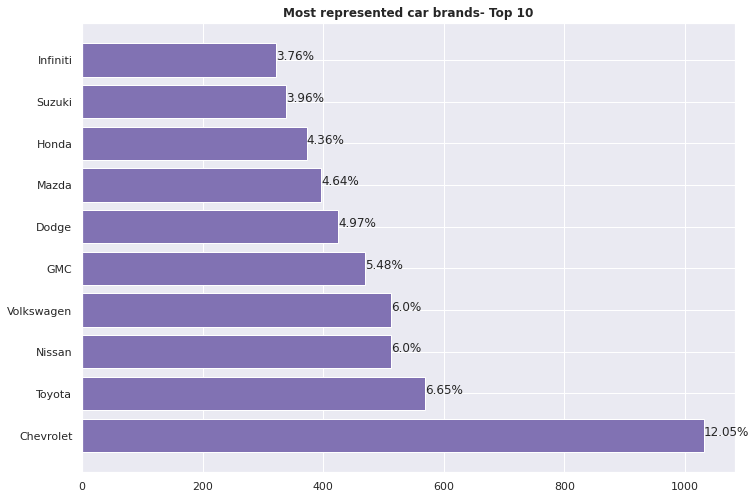

In [31]:
#Visualizing the popular car brands vs how often they've occured gives us a  better and convenient insight.
#Hence we shall blot a bar graph between them.
y=car_df["Make"].value_counts()[:10].sort_values(ascending=False).index.tolist()
plt.barh(y,x,color="m")
plt.title("Most represented car brands- Top 10", weight="bold")

for index, value in enumerate(x):
    plt.text(value, index, str(round(value*100/car_df.shape[0],2))+"%")

We can realize that Cheverolet stands as the top popular car brand with almost double the margin of Toyota, which has placed second. The margin of difference between the next popular car brands is smaller here after.

Now that we have the top 10 popular car brands/ makers, checking for the average price of their cars will help us understand the prices in the market.

In [32]:
#Making a dataframe of average prices of each of the top 10 car brands
avg_price = car_df[['Make','Price']].loc[(car_df['Make'] == 'Chevrolet')|
               (car_df['Make'] == 'Toyota')|
               (car_df['Make'] == 'Volkswagen')|
               (car_df['Make'] == 'Nissan')|
               (car_df['Make'] == 'GMC')|
               (car_df['Make'] == 'Dodge')|
               (car_df['Make'] == 'Mazda')|
               (car_df['Make'] == 'Honda')|
               (car_df['Make'] == 'Suzuki')|
               (car_df['Make'] == 'Infiniti')].groupby('Make').mean()
avg_price.rename(columns={"Price":"Average MSRP" },inplace=True)
avg_price

,Average MSRP
Make,
Chevrolet,28117.883608
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20830.670025
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


In [33]:
print(avg_price["Average MSRP"].mean())

28194.172694271612


Here we can see that from 1990 to 2017, the average MSRP of Cheverolet cars has been lesser than GMC aand Infinti which stand at 3rd and 5th places respectively. In the same time frame, Suzuki has the least average MSRP in the top 10 brands and appears to be a viable economical option for customers in the last 3 decades.

Also the average MSRP of a car among all the top 10 brands is nearly equal to the average MSRP of cars of Cheverolet and Volkswagen. 

#[7] Correlation Matrix

It is extremely necessary for us to understand the correlation between the features of the cars to understand our dataset deeply. This will give us an understanding of the relations between variables and trends in the market.

In [34]:
car_df.corr()                                 #Correlation matrix

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.324105,-0.107476,0.373784,0.335924,0.200211,0.595736
HP,0.324105,1.000000,0.733489,-0.453277,-0.554052,0.093306,0.742489
Cylinders,-0.107476,0.733489,1.000000,-0.691593,-0.746273,0.012178,0.385791
MPG-H,0.373784,-0.453277,-0.691593,1.000000,0.937131,0.094207,-0.118474
MPG-C,0.335924,-0.554052,-0.746273,0.937131,1.000000,0.082990,-0.194673
Popularity,0.200211,0.093306,0.012178,0.094207,0.082990,1.000000,0.111515
Price,0.595736,0.742489,0.385791,-0.118474,-0.194673,0.111515,1.000000


We can visualize this data using a heat map, which by creating a variation in intensity of colors will depict the strength of positive or negative correlation between variables. This will help us read the correlation easily.

Text(0.5, 1.0, 'Correlation Heatmap')

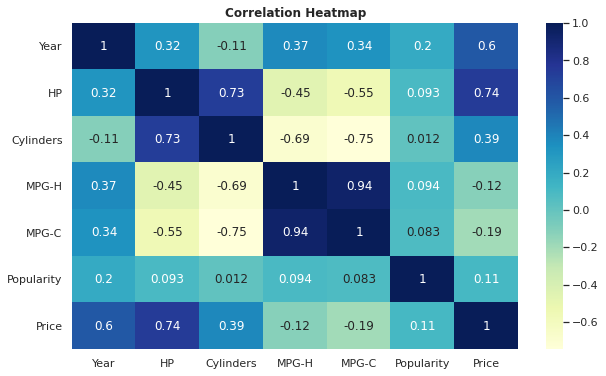

In [35]:
plt.figure(figsize=(10,6))                      #To increase the spread of our plot to aid convenient visualization 
sns.heatmap(car_df.corr(), cmap="YlGnBu",annot=True).set_title("Correlation Heatmap",weight='bold')


Now that we have our plot and correlation values, we can drive valuable insights on our data from here.


**Positive Correlation:**
1.   **Highway MPG** and **City MPG** are **very strongly correlated positively**. The function of an engine is easier on highways since the vehicle is sailing at a particilar speed. City driving may be harder on the engine due to frequent change in speed. But it can be seen than when either capacity of a car has increased/ decreased(MPG-H or MPG-C), the other has increased/ decreased respectively to.
2.   **Cylinders and Price** are **considerably correlated positively to HP**.This is understandable from a general point of view, because as HP of a car increases, its acceleration and overall performance improves leading to a rise in price, but increase in HP comes with a understanding of reduction in fuel efficiency leading to rise in requirement of number of cylinders.
3.   A **good positive correlation** between **price** and **year**.This suggests that over the years, the price of cars have seen a consistent rise as we can see in the real world.

**Negative Correlation:**

1.   **Strong negative correlation** between **city MPG** and **number of engine cylinders**. This can be understood because as MPG i.e. fuel efficiency of engine improves, the requirement of excess cylinders reduces.
2.   **Nearly strong negative correlation** between **highway MPG** and **number of engine cylinders**. The negative correlation is again due to fuel efficiency, but they are a little less negatively correlated as in highways the car is anyhow functioning with its optimal fuel efficiency.
3.  **Mileage per gallon** is **negatively correlated** to **HP** of the car. We know that horsepower signifies the speed at which energy is converted, hence more power indicates higher fuel consumption.

**Minimal correlation:** Popularity does not have a very strong correlation with any variable, not even with price.Hence this is also an useful to understand our market. Year has moderate correlations with MPG and HP,but very less correlation with number of cylinders.

# [8] EDA

Now to finally summarize and complete our exploratory data analysis, we shall plot some important graphs and try drawing conclusive and constructive insights from them.

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16b8e30278>,
      dtype=object)

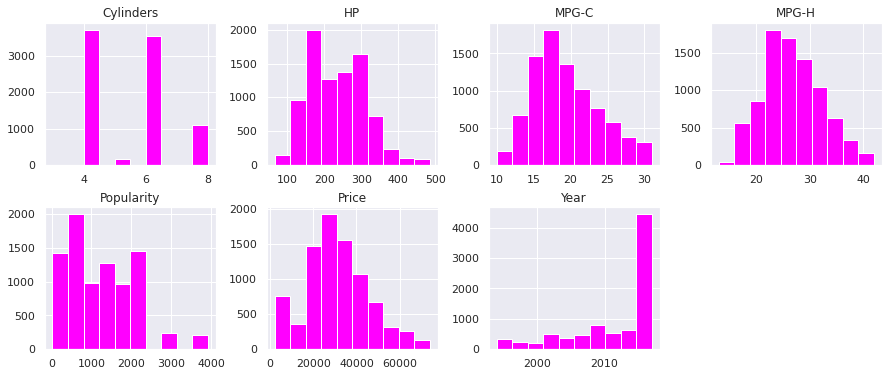

In [36]:
#Plotting histogram subplots
car_df.hist(figsize=(15,6),layout=(2,4),color="fuchsia")

We have plotted the histograms of all numerical columns of our dataset.A histogram is a plot that shows the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g. normal distribution), skewness, etc.

*From the histograms we can conclude the following:*

*   Most cars in the last 3 decades had either 4 or 6 engine cylinders.A few cars had 8 cylinders, and sparsely few had 5.
*   The HP of cars made was mostly in the range 110 to 310 approximately.
*   The Mileage Per Gallon of cars is visually right skewed.
*   Most cars gave 10-20 city MPG and 20-30 highway MPG.
*   Most cars have been moderately popular. Only a small percentage of them got extensively popular.
*   The plot of prices also appears slightly skewed to the right indicating that most cars were in the price range 20,000 to 40,000 Dollars and fewer costlier ones were made. 
*   The cars introduced in the market saw a spike in the last few years (after 2015). 

### Count Plots

Since we have plotted histogram for all the numeric columns, we shall proceed with the categorical variables.These are features which have labelled categories. We shall plot a count(bar) plot for them., Since we have already looked into the top 10 brands, we have dropped Make category. We have also dropped models because we know we will have a large number of Models, but they wouldn't contribute to drawing of useful conclusions on our data.

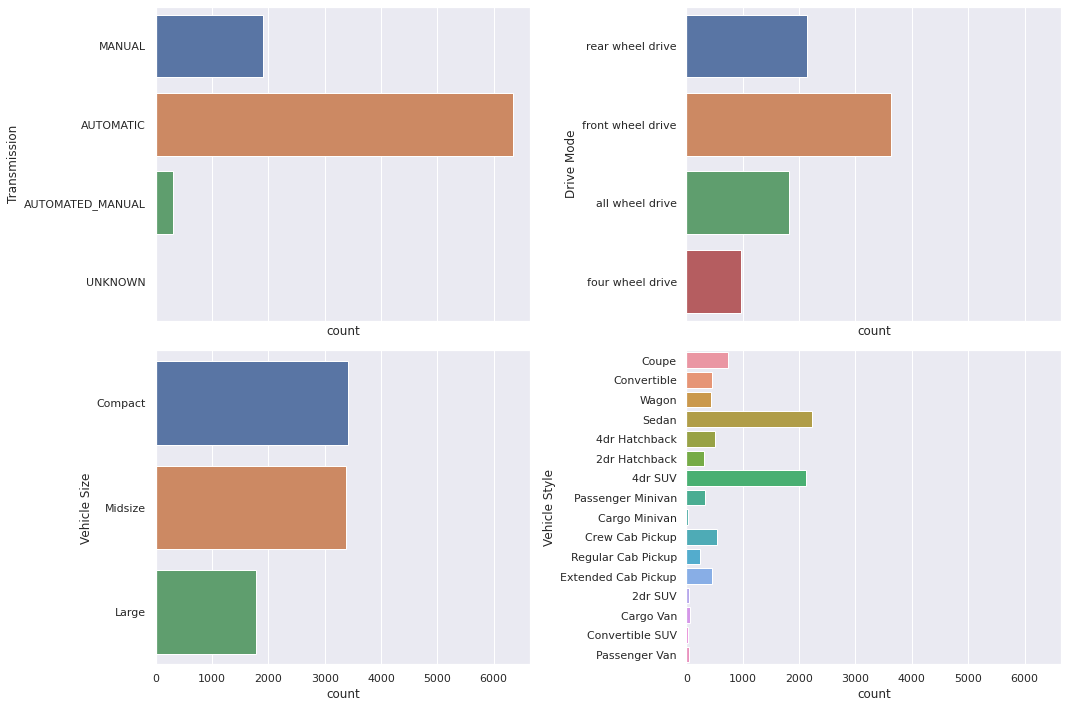

In [37]:
fig, axes =plt.subplots(2,2, figsize=(15,10), sharex=True)          #Set the specifications of our plot layout i.e. number of axes,size of plots, etc
axes = axes.flatten()                                               #Array of subplots
categ_var = car_df.dtypes == 'object'                               #Returns boolean variable True for columns having object data type
categ_var["Model","Make"]=False                                     #As we do not wish to plot count plots for these categorical variables
for ax, catplot in zip(axes, car_df.dtypes[categ_var].index):       #To iterate through the remaining categorical variables and plot their count plots
    sns.countplot(y=catplot, data=car_df, ax=ax )
plt.tight_layout()                                                  #To manage spacing between subplots
plt.show()

From the count plots of the categorical variables, *we can drive some important conclusions.*

*   Majority of the cars made in nearly the last three decades were automatic, hence the demand for  these maybe higher in the market compared to manual options.
*   Number of cars made with front wheel drive mode was almost double of those with rear wheel drive and all wheel drive. Fewer models with four wheel drive were made. This is a reflection of the market preference.
*   People preferred cars of moderate or compact sizes more than large ones.
*   Sedans and 4 door SUV's were almost 4 times  popular in comparison to styles like convertible, wagon,etc. Coupe had a little wider market compared to convertibles,hatchbacks, etc. Vans, and 2 door and convertible SUV's were comparatively less popular. 


With all these steps completed, we have nearly taken insights from all the features, from numerical to categorical. We have seen the preferences of buyers in features like style or size of the car to mileage and price of the same. We have seen the dependance of price on most of them as well. Now we have a better understanding of our market which can aid the predictions of our model.

# **Machine Learning Modelling**


Now that we have completed EDA of our dataset, we shall proceed to build a Machine Learning model on our dataset. We shall have MSRP or Price as a target feature for the same, to figure out the price of a car based on its features.

So, our very first step will be to split our dataset. We do this because if we made a model using the entire dataset, once the model is ready, there will be no dataset that we can test the model on before applying it on real-life future borrowers or users. We shall split our dataset in 80:20 ratio, so that our model is built using 80% of the available data and is tested on the remaining 20%.

One more important thing to do is encode the categorical variables, because algorithms of ML models require input and output to be numbered. Ecoding these variables and making sure they contribute to the input, will enable our algorithm to use these to increase the predictible power of our model.

In [38]:
from sklearn.model_selection import train_test_split    #Importing function required to split our dataset 
from sklearn.preprocessing import LabelEncoder          #Importing the required encoder

In [39]:
categ=car_df.select_dtypes(exclude=[np.number]).columns
categ                                                   #These are the feature columns that are categorical 

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [40]:
for i in categ:
  car_df[i]=LabelEncoder().fit_transform(car_df[i])    #Encoding our data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
x=car_df.iloc[:,:-1]                      #Biforcating the input of our model from the dataset and assigning it to x
y=car_df.iloc[:,-1].values                #Assigning Price as the target feature(last column)       
from sklearn.preprocessing import StandardScaler        #Scaling our feature inputs using Standard Scaler
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y.reshape(-1,1))                   #Since input to transform has to be a 2-D matrix

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8) #Split the dataset into 80:20 ratio
print ("x_train shape: ", x_train.shape)                #Training input
print ("y_train shape: ", y_train.shape)                #Training output
print("x_test shape: ", x_test.shape)                   #Testing Input
print ("y_test shape: ", y_test.shape)                  #Testing Output

x_train shape:  (6844, 12)
y_train shape:  (6844, 1)
x_test shape:  (1711, 12)
y_test shape:  (1711, 1)


Now we shall model our data using different algorithms. Since this is a regression problem we shall be using algorithms suitable for the same.

### Linear Regression 

The first algorithm we have used is Linear Regression. This algorithm will attempt to build a model between x and y by fitting a linear equation to the data. 

In [43]:
#Fit Linear Regression to our data
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)                   #Obtain the predictions of the model

In [44]:
#Evaluating the performance of our model with the help of metrics
from sklearn import metrics
print('\033[4m'+"EVALUATION METRICS : LINEAR REGRESSION"+'\033[0m',"\nMean Absolute Error=",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error=",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Finding R2 score
from sklearn.metrics import r2_score
print("\n",'\033[1m'+"R-squared Score="+'\033[0m',r2_score(y_test,y_pred))
#print("Training model score=",model.score(x_train,y_train))

EVALUATION METRICS : LINEAR REGRESSION 
Mean Absolute Error= 0.3998230539894437
Mean Squared Error= 0.28026553207284854
Root Mean Square Error= 0.5294011069811325

 R-squared Score= 0.7253352730713627


In [45]:
sns.set(rc={'figure.figsize':(10,5)})            #Setting plot layout size

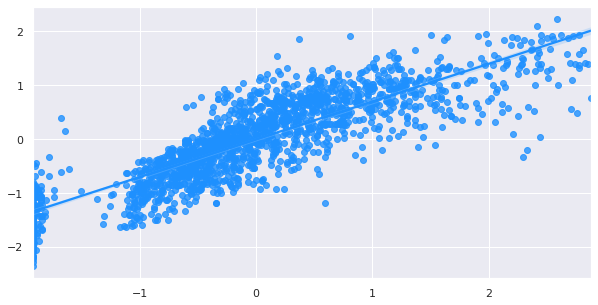

In [46]:
sns.regplot(y_test,y_pred,color="dodgerblue")    #Shows relationship between the expected and obtained output

We expect a strong linear relation with minimum variations while plotting the relationship between expected output and prediction of the algorithm.

Here we can observe a fair positive linear relation between the two outputs.Our R-squared score is decent in this algorithm.

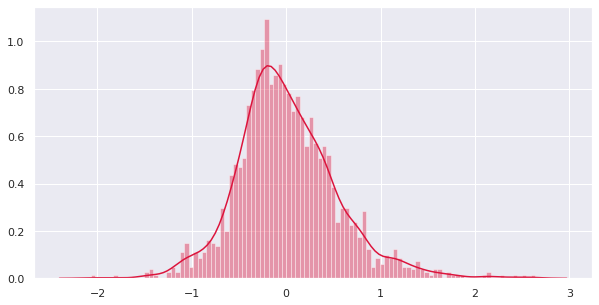

In [47]:
sns.distplot((y_test-y_pred),bins=100,color="crimson") #Plot a distplot with 100 bins(histogram)

We have plotted a distplot here. This will draw a histogram and fit a kernel density estimate (KDE). Here we want the errors to be normally distributed as assumed.

The plot shows errors which are approaching a normal distribution.

### Support Vector Regression

In [48]:
#Fit Support Vector Regression to our data
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)                   #Obtain the predictions of the model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#Evaluating the performance of our model with the help of metrics
from sklearn import metrics
print('\033[4m'+"EVALUATION METRICS : SVR"+'\033[0m',"\nMean Absolute Error=",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error=",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Finding R2 score
from sklearn.metrics import r2_score
print("\n",'\033[1m'+"R-squared Score="+'\033[0m',r2_score(y_test,y_pred))
#print("Training model score=",model.score(x_train,y_train))

EVALUATION METRICS : SVR 
Mean Absolute Error= 0.23858102728782143
Mean Squared Error= 0.12245432031926809
Root Mean Square Error= 0.3499347372286268

 R-squared Score= 0.8799927975339426


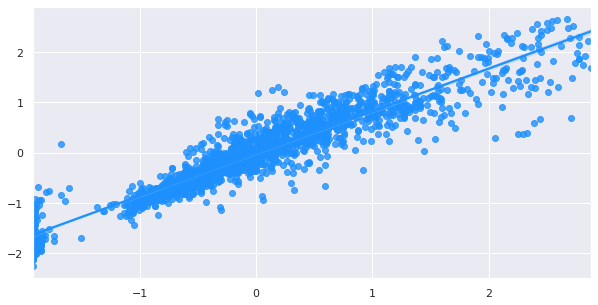

In [50]:
sns.regplot(y_test,y_pred,color="dodgerblue")    #Shows relationship between the expected and obtained output

We can see that SVR gave better linearity between test output and predicted output than Linear Regression.

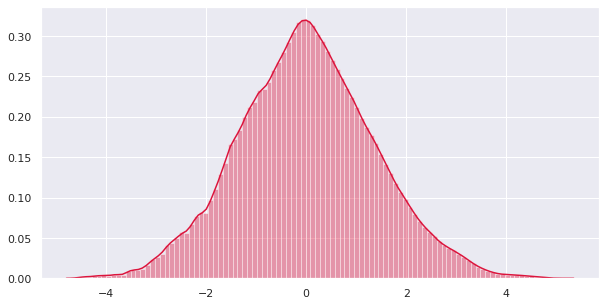

In [51]:
sns.distplot((y_test-y_pred),bins=100,color="crimson") #Plot a distplot with 100 bins(histogram)

We can visualize that errors are nearly fully normalized when we fit SVR to our dataset.

### K-Nearest Neighbors

In [52]:
#Fit K-NN to our dataset
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)                   #Obtain the predictions of the model

In [53]:
#Evaluating the performance of our model with the help of metrics
from sklearn import metrics
print('\033[4m'+"EVALUATION METRICS : K-NN"+'\033[0m',"\nMean Absolute Error=",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error=",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Finding R2 score
from sklearn.metrics import r2_score
print("\n",'\033[1m'+"R-squared Score="+'\033[0m',r2_score(y_test,y_pred))
#print("Training model score=",model.score(x_train,y_train))

EVALUATION METRICS : K-NN 
Mean Absolute Error= 0.20574049633665487
Mean Squared Error= 0.09327525974816844
Root Mean Square Error= 0.30540998632685284

 R-squared Score= 0.9085887459708416


In [54]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

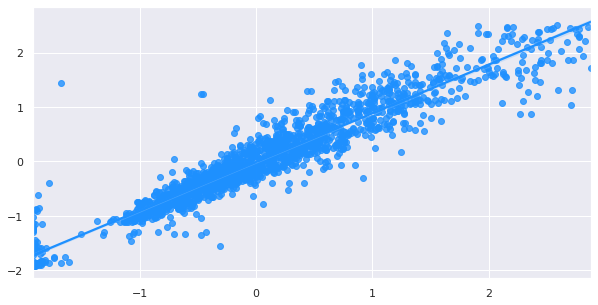

In [55]:
sns.regplot(y_test,y_pred,color="dodgerblue")    #Shows relationship between the expected and obtained output

K-NN algorithm has provided almost the same linearity as SVR. R-squared score shows small growth.

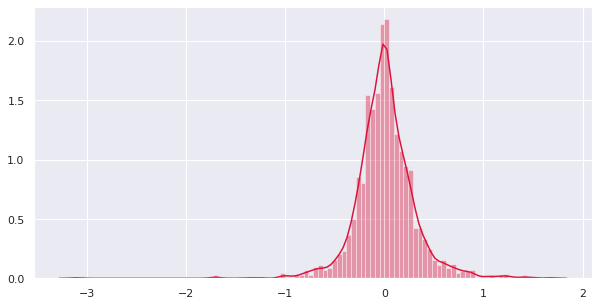

In [56]:
sns.distplot((y_test-y_pred),bins=100,color="crimson") #Plot a distplot with 100 bins(histogram)

Distplot shows a decent normal curve.

### Decision Tree Regressor

In [57]:
#Fit Decision Tree Regression to our dataset
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)                   #Obtain the predictions of the model

In [58]:
#Evaluating the performance of our model with the help of metrics
from sklearn import metrics
print('\033[4m'+"EVALUATION METRICS : DECISION TREE REGRESSION"+'\033[0m',"\nMean Absolute Error=",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error=",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Finding R2 score
from sklearn.metrics import r2_score
print("\n",'\033[1m'+"R-squared Score="+'\033[0m',r2_score(y_test,y_pred))
#print("Training model score =",model.score(x_train,y_train))

EVALUATION METRICS : DECISION TREE REGRESSION 
Mean Absolute Error= 0.17326465593605034
Mean Squared Error= 0.07066620920192572
Root Mean Square Error= 0.2658311667241554

 R-squared Score= 0.9307459789651057


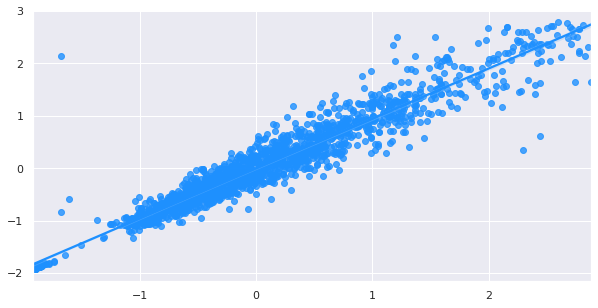

In [59]:
sns.regplot(y_test,y_pred,color="dodgerblue")    #Shows relationship between the expected and obtained output

Positive linear correlativity has improved in comparison to previous plots. R-sqaured score sees growth in comparison too.

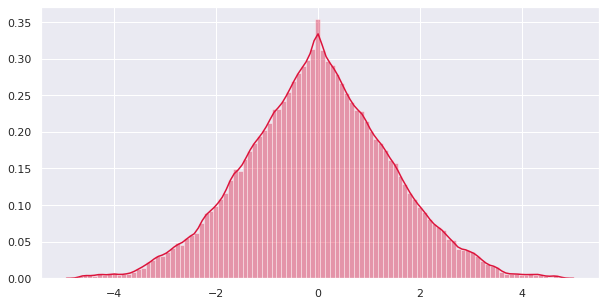

In [60]:
sns.distplot((y_test-y_pred),bins=100,color="crimson") #Plot a distplot with 100 bins(histogram)

We recieve a well fit normal cure with a pointed peak when Decision Tree is fit to our dataset.

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)                   #Obtain the predictions of the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
model.predict(x_test)

In [62]:
#Evaluating the performance of our model with the help of metrics
from sklearn import metrics
print('\033[4m'+"EVALUATION METRICS : RANDOM FOREST"+'\033[0m',"\nMean Absolute Error=",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error=",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Finding R2 score
from sklearn.metrics import r2_score
print("\n",'\033[1m'+"R-squared Score="+'\033[0m',r2_score(y_test,y_pred))
#print("Training model score=",model.score(x_train,y_train))

EVALUATION METRICS : RANDOM FOREST 
Mean Absolute Error= 0.15872505874725712
Mean Squared Error= 0.05131125830097043
Root Mean Square Error= 0.2265198850012299

 R-squared Score= 0.9497141419946796


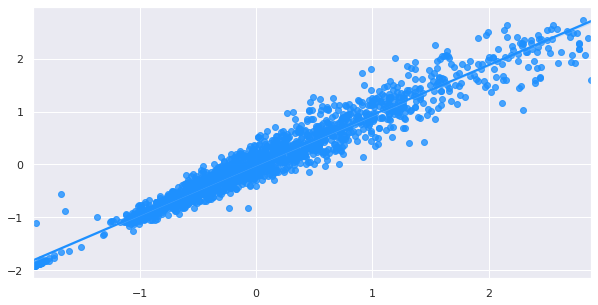

In [63]:
sns.regplot(y_test,y_pred,color="dodgerblue")    #Shows relationship between the epected and obtained output

Random Forest gives strong positive linearity with reduced variations. The R2 score for this algorithm is seen to be the best until now. 

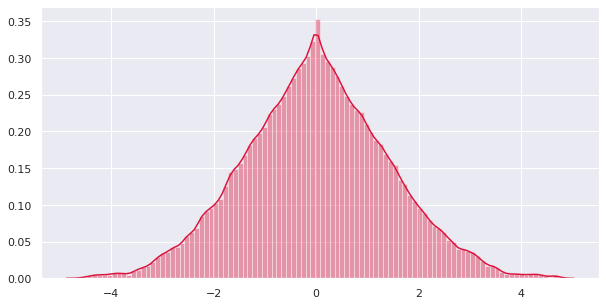

In [64]:
sns.distplot((y_test-y_pred),bins=100,color="crimson") #Plot a distplot with 100 bins(histogram)

Looking at the plots,we can conclude the Random Forest proved to be the best fit for out alogrithm among the ones fit into our dataset.

# Conclusion

Hence, we have completed Exploratory data analysis on our dataset and built a ML model for it. We have built various algorithms on our dataset and evaluated their performance based on metrics MAE, RMSE, and R-Square scores and documented our findings. 

The insights on trends of the market and preferrences of customers drawn from this data of cars introduced in the market in almost 3 decades can aid manufacturers to improve upon their products and focus upon serving the market needs better. Our model can predict a nearby approximate market price for the models depending on the given features.

With this we have completed an overview of the usual process of data analysis and model building in Machine Learning.



---

Project submitted by: **RITIKA SIYAL**

Mentored by: **MR. MALINENI MAURYA**